## Langkah 0: Memuat Dataset

In [23]:
import pandas as pd

file_path = 'dataset/data_seluler.csv'
data = pd.read_csv(file_path)

In [24]:
data.shape

(2000, 21)

In [25]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_class
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,1
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,0


## Langkah 1: Memeriksa missing values
Dataset berisi 2000 baris dan 21 kolom tanpa missing values, karena semua kolom memiliki data yang lengkap.

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

## Langkah 2: Persentase Ponsel dengan Bluetooth
Selanjutnya, saya akan menghitung persentase ponsel yang memiliki fitur Bluetooth (warna biru adalah 1). 

In [27]:
# Menghitung persentase ponsel dengan fitur Bluetooth 
bluetooth_percentage = (data['blue'].mean() * 100).round(2) 
bluetooth_percentage

np.float64(49.5)

Sekitar **49,5%** ponsel dalam dataset ini memiliki fitur Bluetooth.

## Langkah 3: Memeriksa Data Balance dalam Kelas Harga
Sekarang, saya akan menganalisis balancing antara kelas low-end (price_class = 0) dan high-end (price_class = 1) dalam set data yang kemudian divisualisasikan dengan menggunakan diagram batang untuk mengamati distribusinya

C:\Users\hp\AppData\Local\Temp\ipykernel_11048\216937854.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='price_class', data=data, palette="viridis")


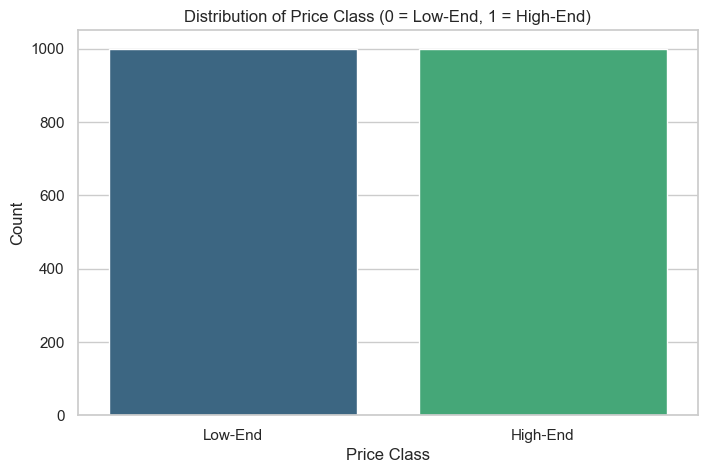

price_class
0    50.0
1    50.0
Name: proportion, dtype: float64

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.countplot(x='price_class', data=data, palette="viridis")
plt.title('Distribution of Price Class (0 = Low-End, 1 = High-End)')
plt.xlabel('Price Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Low-End', 'High-End'])
plt.show()

class_distribution = data['price_class'].value_counts(normalize=True) * 100
class_distribution


dari hasil yang didapatkan menunjukan bahwa dataset ini sangat seimbang antara dua kelas, dengan **50%** ponsel diklasifikasikan sebagai ponselkelas bawah `(price_class = 0)` dan 50% ponsel kelas atas `(price_class = 1)`.

## Langkah 4: Pengelompokan K-Means
Sekarang, saya akan melakukan pengelompokan K-means pada dataset untuk mengidentifikasi kelompok dengan fitur yang sama, setelah itu saya akan menganalisis dan memberi label pada cluster berdasarkan karakteristiknya. 

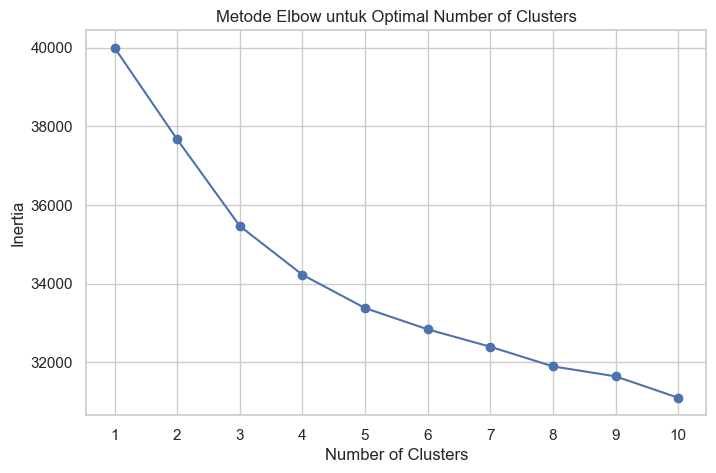

In [29]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = data.drop(columns=['price_class'])

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Optimal Number of Clusters')
plt.xticks(cluster_range)
plt.show()


In [32]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(features_scaled)
data['Cluster'] = clusters

In [33]:
cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary)

         battery_power      blue  clock_speed  dual_sim        fc    four_g  \
Cluster                                                                       
0          1226.239407  0.523305     1.581356  0.521186  4.194915  0.000000   
1          1257.015021  0.506438     1.564807  0.467811  9.547210  0.669528   
2          1214.749398  0.484337     1.394699  0.481928  2.368675  0.715663   
3          1249.400309  0.472952     1.530294  0.548686  1.865533  0.670788   

         int_memory     m_dep   mobile_wt   n_cores  ...    px_height  \
Cluster                                              ...                
0         32.491525  0.509958  140.082627  4.580508  ...   665.476695   
1         28.476395  0.506223  143.547210  4.405579  ...   580.206009   
2         32.997590  0.506265  140.773494  4.812048  ...  1050.320482   
3         33.683153  0.489645  137.658423  4.372488  ...   417.081917   

            px_width          ram       sc_h      sc_w  talk_time   three_g  \
Cluster

# Kesimpulan

### 1) Apakah ada nilai yang hilang dalam dataset?
Tidak ada nilai yang hilang dalam dataset ini. Semua 21 fitur memiliki data lengkap untuk masing-masing dari 2000 entri, sehingga tidak diperlukan imputasi atau pembersihan data.

### 2) Berapa persentase ponsel yang memiliki fitur Bluetooth?
Sekitar **49,5%** ponsel dalam dataset ini memiliki fitur Bluetooth. Persentase ini dihitung dengan mencari proporsi entri di mana fitur `blue` bernilai 1 (menunjukkan keberadaan Bluetooth).

### 3) Apakah data seimbang atau tidak seimbang dalam hal kelas harga?
Data ini seimbang sempurna antara dua kelas. Variabel target `price_class`, yang menunjukkan apakah ponsel termasuk kelas bawah (0) atau kelas atas (1), memiliki pembagian yang sama:
   - **50%** ponsel termasuk kelas bawah.
   - **50%** termasuk kelas atas.

### 4) Pengelompokan menggunakan K-means: Jumlah grup, karakteristik, dan label
Setelah menerapkan Metode Elbow untuk K-means, ditemukan jumlah klaster yang optimal adalah 4. Setiap klaster kemudian dianalisis berdasarkan nilai rata-rata dari setiap fitur, menghasilkan interpretasi sebagai berikut:
- **Klaster 0**: "Perangkat Fitur Tinggi Kelas Atas"  
   - Memiliki RAM yang tinggi, ukuran layar besar, resolusi tinggi, serta kapasitas baterai yang besar. Klaster ini menggambarkan ponsel dengan spesifikasi canggih, cocok untuk pengguna yang mencari performa dan fitur premium.

- **Klaster 1**: "Perangkat Dasar dan Ramah Anggaran"  
   - Memiliki RAM rendah, layar kecil, resolusi kamera rendah, dan umumnya kekurangan fitur-fitur canggih seperti 4G. Ini menunjukkan perangkat yang lebih terjangkau dan cocok untuk pengguna dengan kebutuhan dasar.

- **Klaster 2**: "Perangkat Menengah dengan Fitur Seimbang"  
   - Memiliki spesifikasi yang sedang pada sebagian besar fitur, dengan RAM dan kapasitas baterai yang cukup baik, serta mendukung beberapa fitur canggih seperti 4G. Klaster ini menggambarkan perangkat kelas menengah yang menawarkan keseimbangan antara kinerja dan harga.

- **Klaster 3**: "Perangkat Kelas Atas Berfokus pada Kamera"  
   - Klaster ini memiliki fokus pada fitur kamera, dengan resolusi kamera utama dan depan yang tinggi, serta RAM yang cukup besar. Ponsel di klaster ini cocok bagi pengguna yang mencari ponsel dengan kamera berkualitas tinggi, meskipun spesifikasi lainnya mungkin tidak sekuat perangkat di Klaster 0.